tenemos que crear los numeros pseudo aletorios para por der realizar la simulacion


usaremos el metodo dCongruencial Mixto


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt
from collections import Counter
import time

# definimos nuestros parametros
#semilla
x0 = 12345
#multiplicador
a = 1664525
#constante aditiva
c = 1013904223
#modulo
m = 4294967296
#cantidad de numeros a generar
n = 4000000

importamos la librerias para trabajar

In [2]:
def generador_lineal_congruencial(x0, a, c, m, n):
    """
    Genera una secuencia de números pseudoaleatorios usando el método del generador lineal congruencial.
    """
    # Listas para almacenar valores
    valores_raw = []
    valores_norm = []
    
    # Generar n números pseudoaleatorios
    for _ in range(n):
        # Guardar valor normalizado actual
        valor_norm = x0 / m
        valores_norm.append(valor_norm)
        
        # Guardar valor raw actual
        valores_raw.append(x0)
        
        # Calcular siguiente valor
        x0 = (a * x0 + c) % m
    
    # Crear DataFrame con los resultados
    df = pd.DataFrame({
        "numero": range(1, n+1),
        "N-pseudoaletorios": valores_raw,
        "N-pseudoaletorios-Normalisados": valores_norm
    })
    
    return df

creamos las pruebas 

In [3]:
def prueba_de_medias(numeros_norm, n):
    """
    Realiza la prueba de medias y muestra un gráfico independiente.
    """
    prueba = False
    print("="*50)
    print("PRUEBA DE MEDIAS")
    print("="*50)
    alfa = 0.05
    z_valor = norm.ppf(1 - alfa/2)  # Z(1-alfa/2)
    promedio_muestra = np.mean(numeros_norm)

    # Cálculo de límites según la fórmula
    limite_inferior = 0.5 - z_valor * (1/np.sqrt(12*n))
    limite_superior = 0.5 + z_valor * (1/np.sqrt(12*n))
    

    print(f"α = {alfa}")
    
    print(f"1 - α/2 = {1 - alfa/2}")
    print(f"Z(1-α/2) = {z_valor:.6f}")
    print(f"Límite Inferior = {limite_inferior:.10f}")
    print(f"Promedio Muestra R̄ = {promedio_muestra:.10f}")
    print(f"Límite Superior = {limite_superior:.10f}")

    if limite_inferior <= promedio_muestra <= limite_superior:
        print("No podemos rechazar la hipótesis de aleatoriedad")
        prueba = True
    else:
        print("Rechazamos la hipótesis de aleatoriedad")
    

    # Crear figura independiente
    plt.figure(figsize=(10, 6))
    plt.axhline(y=0.5, color='r', linestyle='-', label='Media esperada')
    plt.axhline(y=limite_inferior, color='orange', linestyle='--', label=f'Límite inferior ({limite_inferior:.4f})')
    plt.axhline(y=limite_superior, color='orange', linestyle='--', label=f'Límite superior ({limite_superior:.4f})')
    plt.axhline(y=promedio_muestra, color='green', linestyle=':', label=f'Media muestral ({promedio_muestra:.4f})')
    plt.title('Prueba de Medias')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    return prueba

pruevas de variaza

In [4]:
def prueba_de_varianza(numeros_norm, n):

    prueba = False
    print("\n" + "="*50)
    print("PRUEBA DE VARIANZA")
    print("="*50)
    alfa2 = 0.05
    varianza_muestra = np.var(numeros_norm)

    # Valores críticos de chi-cuadrado
    chi2_inf = chi2.ppf(alfa2/2, n-1)
    chi2_sup = chi2.ppf(1 - alfa2/2, n-1)

    # Cálculo de límites según la fórmula correcta
    limite_inferior_var = chi2_inf / (12 * (n-1))
    limite_superior_var = chi2_sup / (12 * (n-1))

    print(f"α/2 = {alfa2/2}")
    print(f"1 - α/2 = {1 - alfa2/2}")
    print(f"χ²(α/2, n-1) = {chi2_inf:.8f}")
    print(f"χ²(1 - α/2, n-1) = {chi2_sup:.8f}")
    print(f"Límite Inferior = {limite_inferior_var:.10f}")
    print(f"Varianza Muestra R = {varianza_muestra:.10f}")
    print(f"Límite Superior = {limite_superior_var:.10f}")

    if limite_inferior_var <= varianza_muestra <= limite_superior_var:
        print("No podemos rechazar la hipótesis de aleatoriedad")
        prueba = True
    else:
        print("Rechazamos la hipótesis de aleatoriedad")

    # Crear figura independiente
    plt.figure(figsize=(10, 6))
    plt.axhline(y=1/12, color='r', linestyle='-', label='Varianza esperada (1/12)')
    plt.axhline(y=limite_inferior_var, color='orange', linestyle='--', label=f'Límite inferior ({limite_inferior_var:.4f})')
    plt.axhline(y=limite_superior_var, color='orange', linestyle='--', label=f'Límite superior ({limite_superior_var:.4f})')
    plt.axhline(y=varianza_muestra, color='green', linestyle=':', label=f'Varianza muestral ({varianza_muestra:.4f})')
    plt.title('Prueba de Varianza')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return prueba

In [5]:
def prueba_de_uniformidad(numeros_norm, n):
    prueba = False
    print("\n" + "="*50)
    print("PRUEBA DE UNIFORMIDAD (CHI-CUADRADA)")
    print("="*50)

    # Definir número de intervalos (m)
    m = 10
    intervalos = np.linspace(0, 1, m+1)
    esperado_por_intervalo = n / m

    # Calcular frecuencias observadas
    frecuencias_observadas, _ = np.histogram(numeros_norm, bins=intervalos)

    # Crear tabla de resultados
    print(f"m = {m}, n/m = {esperado_por_intervalo}")
    print(f"{'Intervalos':<12} {'Observada (Oi)':<15} {'Esperada (Ei)':<15} {'(Ei-Oi)²/Ei':<15}")
    print("-" * 60)

    # Calcular estadístico chi-cuadrado
    chi2_stat = 0
    for i in range(m):
        intervalo_inf = intervalos[i]
        intervalo_sup = intervalos[i+1]
        observada = frecuencias_observadas[i]
        esperada = esperado_por_intervalo
        chi2_parcial = ((observada - esperada)**2) / esperada
        chi2_stat += chi2_parcial
        print(f"{intervalo_inf:.2f}-{intervalo_sup:.2f}  {observada:<15d} {esperada:<15.1f} {chi2_parcial:<15.2f}")

    print(f"Control: {sum(frecuencias_observadas):<15d} {n:<15d} {chi2_stat:<15.2f}")

    # Evaluar resultado
    alfa_chi = 0.05
    chi2_critico = chi2.ppf(1-alfa_chi, m-1)
    print(f"\nα = {alfa_chi}")
    print(f"χ²(α, m-1) = {chi2_critico:.8f}")  # Corregido a m-1

    if chi2_stat < chi2_critico:
        print("No podemos rechazar la hipótesis de uniformidad")
        prueba = True
    else:
        print("Rechazamos la hipótesis de uniformidad")

    # Crear figura independiente
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(frecuencias_observadas)), frecuencias_observadas, alpha=0.7, label='Observado')
    plt.axhline(y=esperado_por_intervalo, color='r', linestyle='--', label=f'Esperado ({esperado_por_intervalo})')
    plt.xticks(range(len(frecuencias_observadas)), 
               [f"{intervalos[i]:.1f}-{intervalos[i+1]:.1f}" for i in range(m)], 
               rotation=45)
    plt.title('Prueba de Uniformidad (Chi-cuadrada)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return prueba

In [6]:
def prueba_de_poker(numeros_norm, n):
    """
    Realiza la prueba de poker para evaluar la independencia de los números generados.
    """
    prueba = False
    print("\n" + "="*50)
    print("PRUEBA DE INDEPENDENCIA (PRUEBA DE POKER)")
    print("="*50)
    
    def digit_pattern(num):
        # Tomar 5 decimales
        digits = str(num)[2:7] if '.' in str(num) else str(num).zfill(5)[:5]
        counts = Counter(digits)
        
        if len(counts) == 5:
            return 'TD'  # Todos Diferentes
        elif len(counts) == 1:
            return 'Q'   # Quintilla (todos iguales)
        elif len(counts) == 2:
            if 4 in counts.values():
                return 'P'  # Poker (4 iguales)
            else:
                return 'TP'  # Tercia y Par (3+2)
        elif len(counts) == 3:
            if 3 in counts.values():
                return 'T'  # Tercia (3 iguales)
            else:
                return '2P'  # Dos Pares
        else:
            return '1P'  # Un Par

    # Calcular frecuencias observadas del Poker test
    patterns = [digit_pattern(num) for num in numeros_norm]
    poker_resultados = Counter(patterns)

    # Definir categorías y probabilidades teóricas
    categorias = {
        'TD': ('Todos Diferentes', 0.3024),
        '1P': ('Un Par', 0.5040),
        '2P': ('Dos Pares', 0.1080),
        'TP': ('Tercia y par', 0.0090),
        'T': ('Tercia', 0.0720),
        'P': ('Poker', 0.0045),
        'Q': ('Quintilla', 0.0001)
    }

    # Crear tabla de resultados
    print(f"n = {n}")
    print(f"{'Categoría':<20} {'Tipo':<5} {'Prob P(x)':<10} {'Esperado (Ei)':<15} {'Observado (Oi)':<15} {'(Ei-Oi)²/Ei':<15}")
    print("-" * 80)

    # Calcular estadístico chi-cuadrado para el poker test
    chi2_poker = 0
    total_observado = 0
    categorias_orden = ['TD', '1P', '2P', 'TP', 'T', 'P', 'Q']
    observados = []
    esperados = []
    
    for cat in categorias_orden:
        nombre, prob = categorias[cat]
        esperado = prob * n
        observado = poker_resultados.get(cat, 0)
        observados.append(observado)
        esperados.append(esperado)
        
        total_observado += observado
        
        if esperado > 0:
            chi2_parcial = ((observado - esperado)**2) / esperado
        else:
            chi2_parcial = 0
            
        chi2_poker += chi2_parcial
        print(f"{nombre:<20} {cat:<5} {prob:<10.4f} {esperado:<15.2f} {observado:<15d} {chi2_parcial:<15.4f}")

    print(f"{'Control':<37} {n:<15d} {total_observado:<15d} {chi2_poker:<15.4f}")

    # Evaluar resultado
    alfa_poker = 0.05
    # Grados de libertad: número de categorías - 1
    grados_libertad = len(categorias) - 1
    chi2_critico_poker = chi2.ppf(1-alfa_poker, grados_libertad)
    print(f"\nα = {alfa_poker}")
    print(f"χ²(α, k-1) = {chi2_critico_poker:.8f}")  # Corregido a k-1

    if chi2_poker < chi2_critico_poker:
        print("No podemos rechazar la hipótesis de independencia")
        prueba = True
    else:
        print("Rechazamos la hipótesis de independencia")

    # Crear figura independiente
    plt.figure(figsize=(12, 6))
    width = 0.35
    x = np.arange(len(categorias_orden))
    plt.bar(x - width/2, esperados, width, label='Esperados')
    plt.bar(x + width/2, observados, width, label='Observados')
    plt.xticks(x, [categorias[cat][0] for cat in categorias_orden])
    plt.title('Prueba de Independencia (Poker)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return prueba

genero los numeros

In [7]:

# Generar los números pseudoaleatorios
df_numeros = generador_lineal_congruencial(x0, a, c, m, n)
numeros_norm = df_numeros["N-pseudoaletorios-Normalisados"].values

prueba de medias

PRUEBA DE MEDIAS
α = 0.05
1 - α/2 = 0.975
Z(1-α/2) = 1.959964
Límite Inferior = 0.4997171036
Promedio Muestra R̄ = 0.4999423519
Límite Superior = 0.5002828964
No podemos rechazar la hipótesis de aleatoriedad


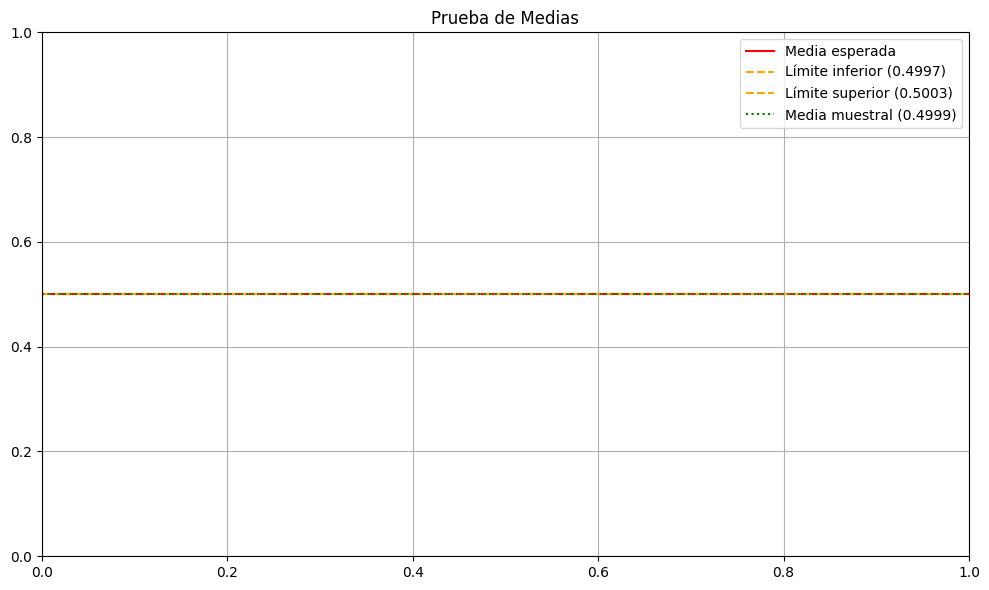

In [8]:
Prueba_medias = prueba_de_medias(numeros_norm, n)

prueba de varianza


PRUEBA DE VARIANZA
α/2 = 0.025
1 - α/2 = 0.975
χ²(α/2, n-1) = 3994457.27994456
χ²(1 - α/2, n-1) = 4005544.50866707
Límite Inferior = 0.0832178808
Varianza Muestra R = 0.0833423943
Límite Superior = 0.0834488648
No podemos rechazar la hipótesis de aleatoriedad


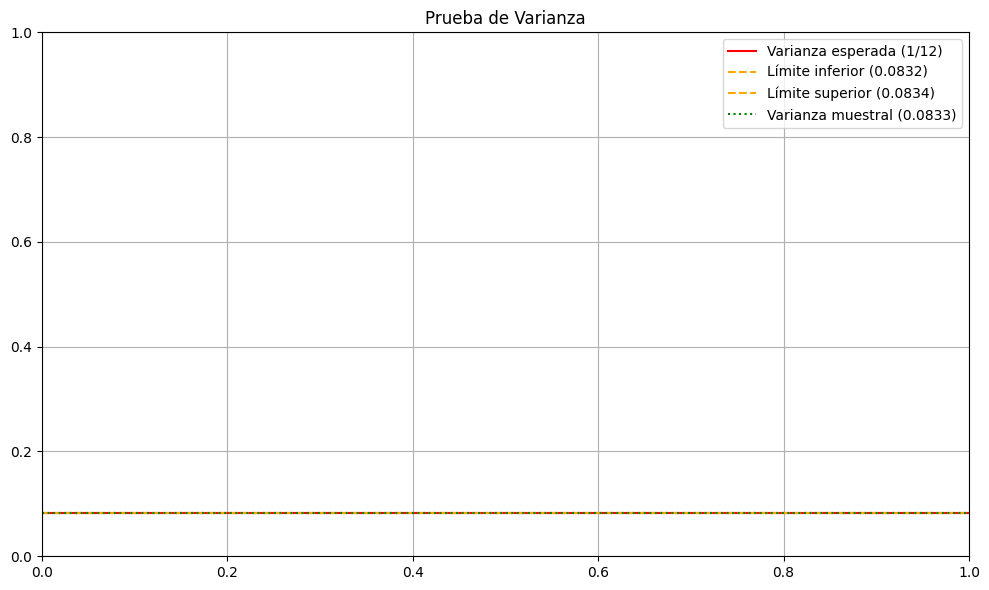

In [9]:
Prueba_varianza = prueba_de_varianza(numeros_norm, n)

prueba de uniformidad


PRUEBA DE UNIFORMIDAD (CHI-CUADRADA)
m = 10, n/m = 400000.0
Intervalos   Observada (Oi)  Esperada (Ei)   (Ei-Oi)²/Ei    
------------------------------------------------------------
0.00-0.10  399488          400000.0        0.66           
0.10-0.20  401270          400000.0        4.03           
0.20-0.30  400838          400000.0        1.76           
0.30-0.40  398946          400000.0        2.78           
0.40-0.50  399297          400000.0        1.24           
0.50-0.60  399741          400000.0        0.17           
0.60-0.70  399985          400000.0        0.00           
0.70-0.80  400570          400000.0        0.81           
0.80-0.90  400173          400000.0        0.07           
0.90-1.00  399692          400000.0        0.24           
Control: 4000000         4000000         11.75          

α = 0.05
χ²(α, m-1) = 16.91897760
No podemos rechazar la hipótesis de uniformidad


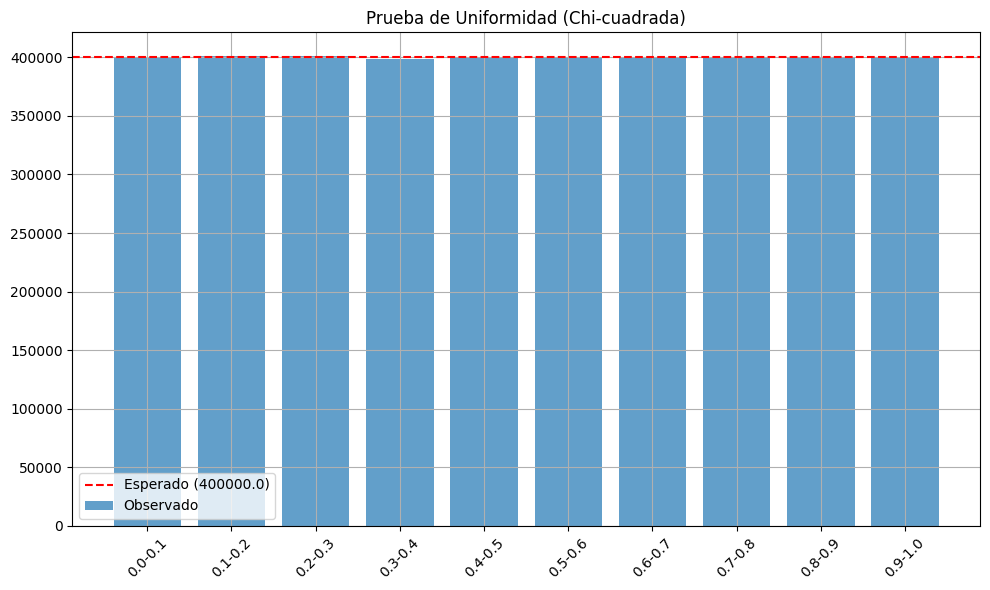

In [10]:
Prueba_uniformidad = prueba_de_uniformidad(numeros_norm, n)

prueba de independecia


PRUEBA DE INDEPENDENCIA (PRUEBA DE POKER)
n = 4000000
Categoría            Tipo  Prob P(x)  Esperado (Ei)   Observado (Oi)  (Ei-Oi)²/Ei    
--------------------------------------------------------------------------------
Todos Diferentes     TD    0.3024     1209600.00      1210989         1.5950         
Un Par               1P    0.5040     2016000.00      2014344         1.3603         
Dos Pares            2P    0.1080     432000.00       432344          0.2739         
Tercia y par         TP    0.0090     36000.00        35997           0.0003         
Tercia               T     0.0720     288000.00       288090          0.0281         
Poker                P     0.0045     18000.00        17857           1.1361         
Quintilla            Q     0.0001     400.00          379             1.1025         
Control                               4000000         4000000         5.4961         

α = 0.05
χ²(α, k-1) = 12.59158724
No podemos rechazar la hipótesis de independencia


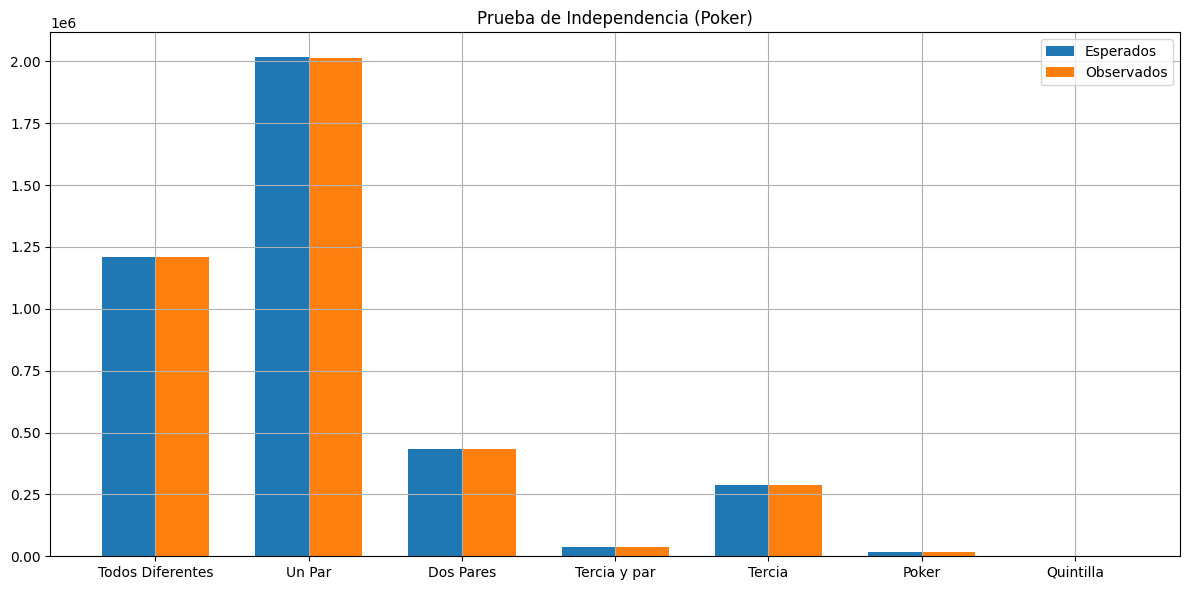

In [11]:
Prueba_independencia = prueba_de_poker(numeros_norm, n)

como el dataframe pasa todas las pruebas los importamos aun csv

In [12]:
#crear un archivo CSV con los resultados
if Prueba_medias and Prueba_varianza and Prueba_uniformidad and Prueba_independencia:
    print("Todas las pruebas fueron exitosas, los números son pseudoaleatorios.")
    hoy = time.strftime("%Y-%m-%d")
    nombre_archivo = f"numeros_pseudoaleatorios_{hoy}.csv"
    df_numeros.to_csv(nombre_archivo, index=False)
else:
    print("Algunas pruebas fallaron, los números no son pseudoaleatorios.")

Todas las pruebas fueron exitosas, los números son pseudoaleatorios.
